# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          #"Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jinchang
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | abalak
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | mao
Processing Record 10 of Set 1 | aksarka
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | axim
Processing Record 13 of Set 1 | kudahuvadhoo
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | lazaro cardenas
Processing Record 17 of Set 1 | honningsvag
Processing Record 18 of Set 1 | puerto maldonado
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | cape town
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          524
Lat           524
Lng           524
Max Temp      524
Humidity      524
Cloudiness    524
Wind Speed    524
Country       524
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,jinchang,38.4953,102.1739,267.99,36,100,1.23,CN
1,busselton,-33.6500,115.3333,285.93,79,6,6.58,AU
2,qaanaaq,77.4840,-69.3632,249.49,66,53,3.95,GL
3,rikitea,-23.1203,-134.9692,299.43,76,11,6.64,PF
4,abalak,58.1286,68.5944,262.73,98,96,1.86,RU


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,jinchang,38.4953,102.1739,267.99,36,100,1.23,CN
1,busselton,-33.6500,115.3333,285.93,79,6,6.58,AU
2,qaanaaq,77.4840,-69.3632,249.49,66,53,3.95,GL
3,rikitea,-23.1203,-134.9692,299.43,76,11,6.64,PF
4,abalak,58.1286,68.5944,262.73,98,96,1.86,RU


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

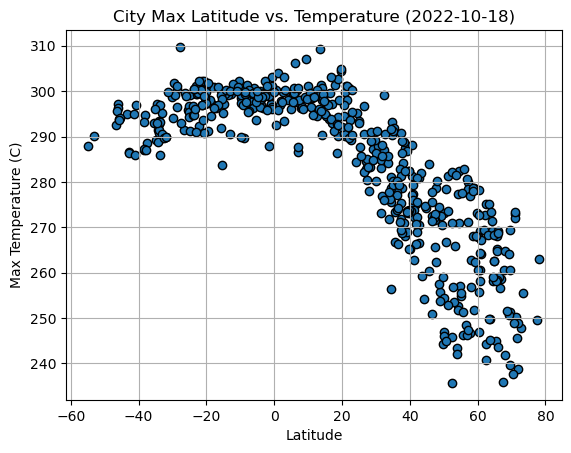

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], linewidths=1, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

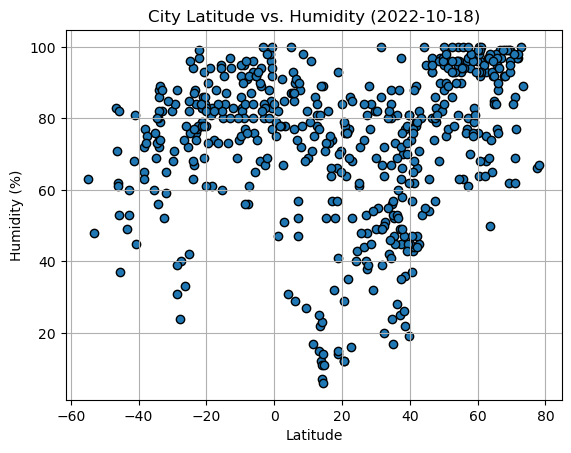

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], linewidths=1, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

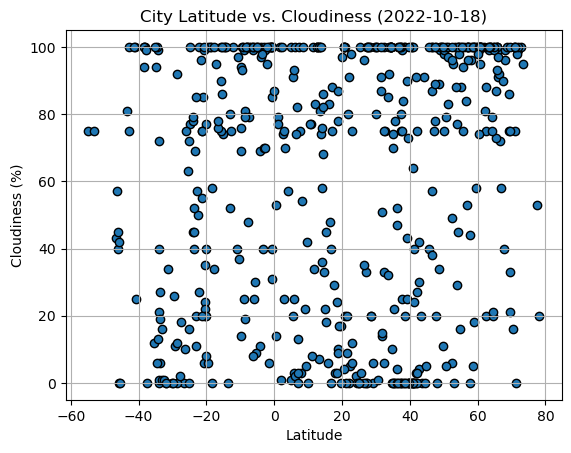

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], linewidths=1, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

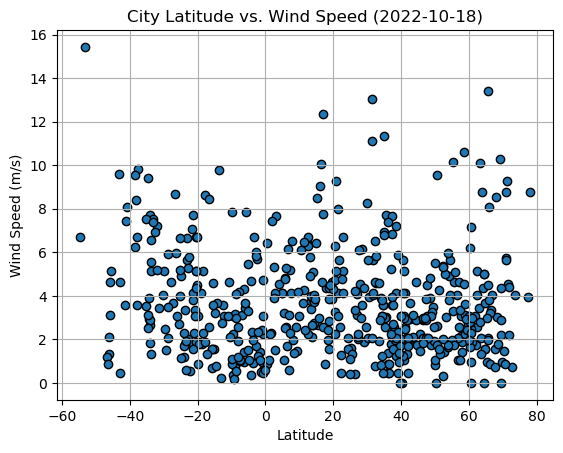

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], linewidths=1, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression(x_value, y_value):
    (slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = line_regress(slope, intercept)
    return(regress_values, rvalue)

def line_regress(slope, intercept):
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    return(line_eq)
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,jinchang,38.4953,102.1739,267.99,36,100,1.23,CN
2,qaanaaq,77.4840,-69.3632,249.49,66,53,3.95,GL
4,abalak,58.1286,68.5944,262.73,98,96,1.86,RU
5,albany,42.6001,-73.9662,270.57,45,42,2.95,US
7,mao,39.8885,4.2658,282.46,81,0,3.09,ES


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
1,busselton,-33.6500,115.3333,285.93,79,6,6.58,AU
3,rikitea,-23.1203,-134.9692,299.43,76,11,6.64,PF
6,hithadhoo,-0.6000,73.0833,300.22,77,31,4.71,MV
12,richards bay,-28.7830,32.0377,296.42,88,92,5.94,ZA
15,puerto maldonado,-12.6000,-69.1833,299.37,94,75,3.60,PE


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8464150305405242


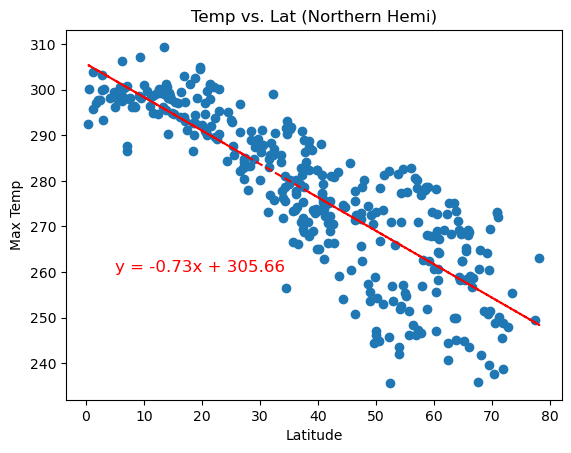

In [17]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
title = "Temp vs. Lat (Northern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (30,280), xytext=(5,260), fontsize=12, color="red")
plt.show()

The r-value is: 0.4856579793628014


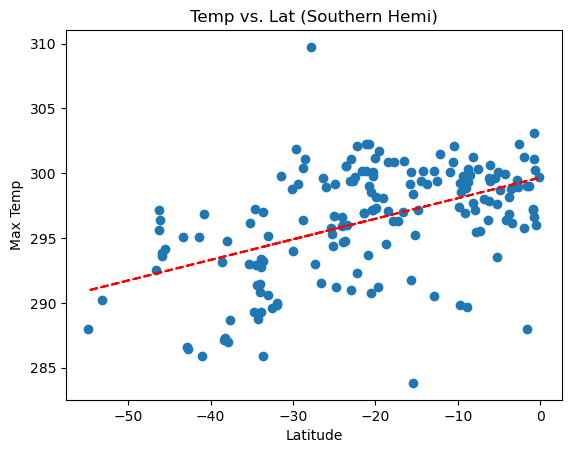

In [18]:
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
title = "Temp vs. Lat (Southern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (30,280), xytext=(-20,287.5), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** In the first scatter plot, temperature decreases as latitude increases going north from the equator and into the Arctic Circle. The r-value for the first scatterplot is very strong at approximately -0.8, demonstrating a negative relationship between temperature and latitude the further north one goes. Similarly, the second scatterplot shows that temperature increases as latitude increases as it goes up from the Antarctic Circle and towards the equator in the second scatterplot. The r-value for the second plot is not quite as strong, with an r-value of 0.44, but it can still be inferred that temperature and latitude are positively related.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42235691014090204


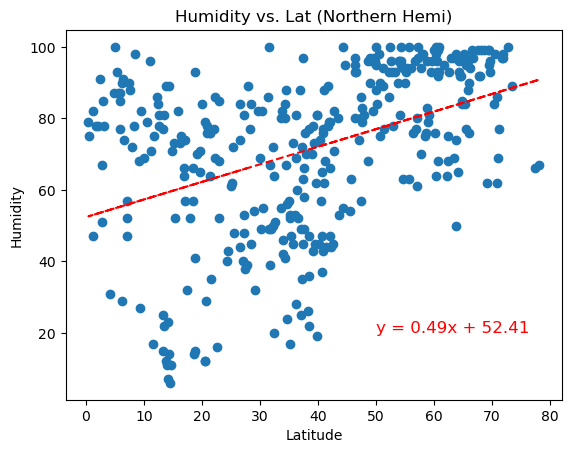

In [19]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
title = "Humidity vs. Lat (Northern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (40,60), xytext=(50,20), fontsize=12, color="red")
plt.show()

The r-value is: 0.472579009763232


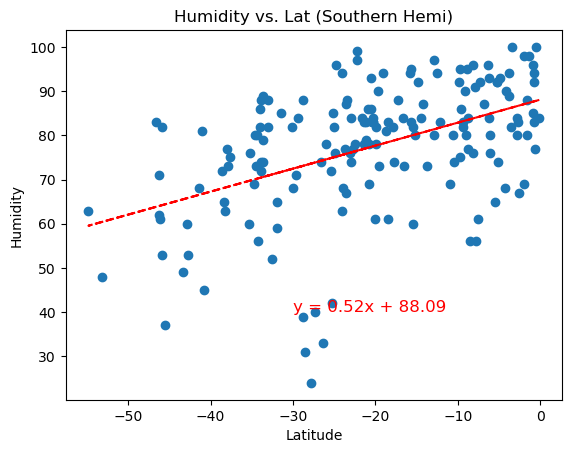

In [20]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
title = "Humidity vs. Lat (Southern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-30,65), xytext=(-30,40), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** In both scatterplots, humidity increases as latitude increases. As for the northern hemisphere, the increase in humidity is maybe due to snow or frequent showers. For the southern hemisphere, humidity is famously high in the equatorial region of the globe. However, neither of these correlations are particularly strong--both scatterplots have r-values of slightly less than 0.5. We can still infer that humidity does increase as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.26866602397415573


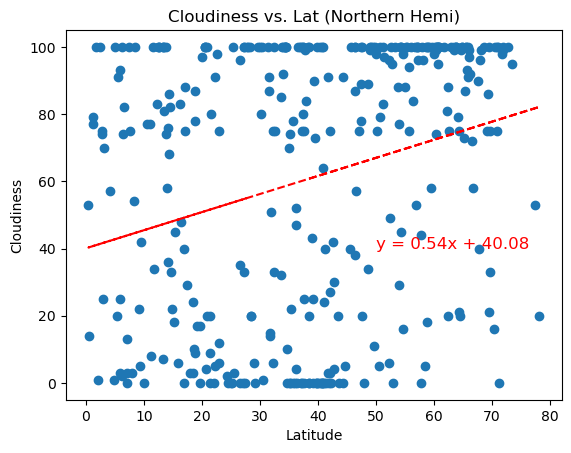

In [21]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Lat (Northern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (40,40), xytext=(50,40), fontsize=12, color="red")
plt.show()

The r-value is: 0.3009753192280674


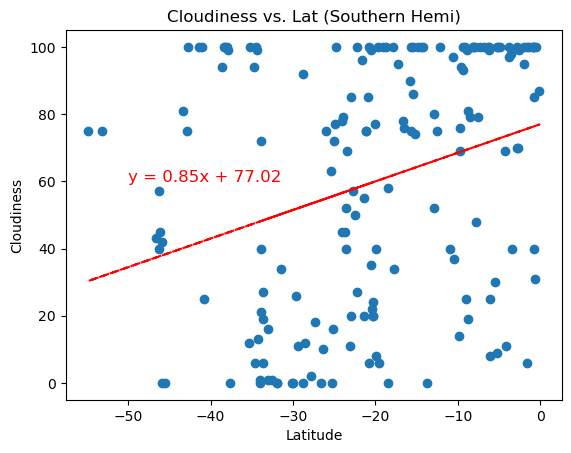

In [22]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Lat (Southern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-30,50), xytext=(-50,60), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** The regression line in the first plot has an r-value of approximately 0.24, which indicates there is not a strong correlation between latitude and cloudiness in the northern hemisphere, although the slope of the line is still positive.
The second scatterplot has a similarly low r-value of approximately 0.27, with an overall positive slope. Based on the r-values of these scatterplots, there is no demonstratable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07767307389816859


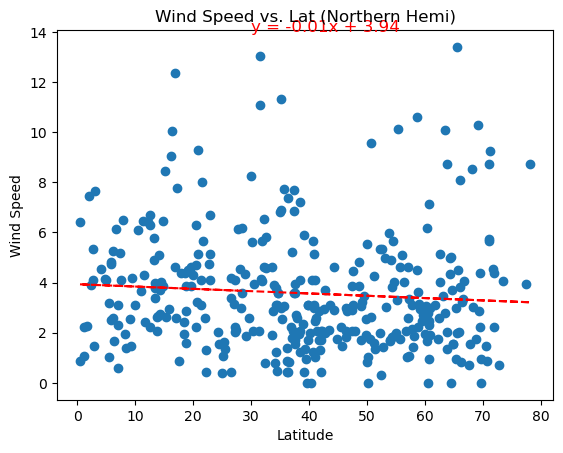

In [23]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
title = "Wind Speed vs. Lat (Northern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (30,3), xytext=(30,14), fontsize=12, color="red")
plt.show()

The r-value is: -0.3900964766481936


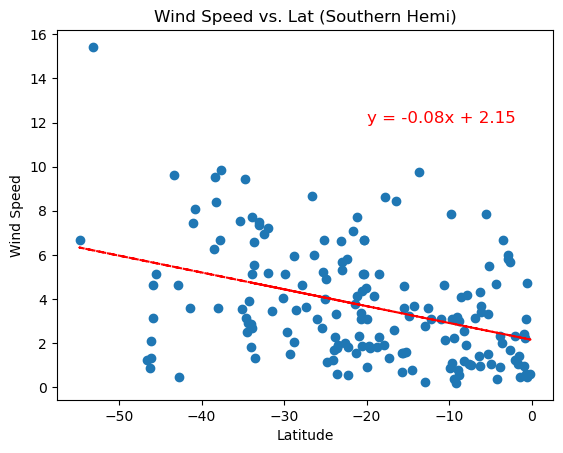

In [24]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
title = "Wind Speed vs. Lat (Southern Hemi)"

(slope, intercept, rvalue, pvalue , stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
print(f"The r-value is: {rvalue}")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "--", color="red")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-30,5), xytext=(-20,12), fontsize=12, color="red")
plt.show()

**Discussion about the linear relationship:** Based on these two scatterplots, we can see that wind speed and latitude do not have any correlation with one another. The r-value for the first scatterplot is approximately 0.09, while the second has an r-value of -0.2, neither of which demonstrate a strong relationship between the two variables. Therefore, wind speed does not change in correlation with latitude.